### This is an ML model to measure the similarity between two images. The input of the test image will be a link (which will be converted to an image) and the output will be a percentage value.

In [10]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [11]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector")

print("Path to model files:", path)

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 5.15k/5.15k [00:00<00:00, 5.24MB/s]



100%|██████████| 1.10M/1.10M [00:02<00:00, 551kB/s]









100%|██████████| 8.65M/8.65M [00:08<00:00, 1.02MB/s]

Path to model files: C:\Users\ayush\.cache\kagglehub\models\google\mobilenet-v2\tensorFlow2\tf2-preview-feature-vector\4


In [13]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import base64
from PIL import Image
import io
import math
from math import sqrt


%matplotlib inline

global embed
embed = hub.KerasLayer(r"C:\Users\ayush\.cache\kagglehub\models\google\mobilenet-v2\tensorFlow2\tf2-preview-feature-vector\4")


In [15]:
for x in os.listdir("."):
    print(x)

.ipynb_checkpoints
1.jpg
2.jpg
A25_MLlab_practical4.ipynb
A25_ML_Practical4.ipynb
A25_ML_TA1.ipynb
Cost_of_Living_Index_by_Country_2024.csv
image-similarity.ipynb
images
imageSimilarityModel.ipynb
titanic.csv
titanic.ipynb


In [16]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [17]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image
    """
    with open(FileName, "rb") as f:
        data = f.read()

    res = base64.b64encode(data)

    base64data = res.decode("UTF-8")

    imgdata = base64.b64decode(base64data)

    image = Image.open(io.BytesIO(imgdata))

    return np.array(image)


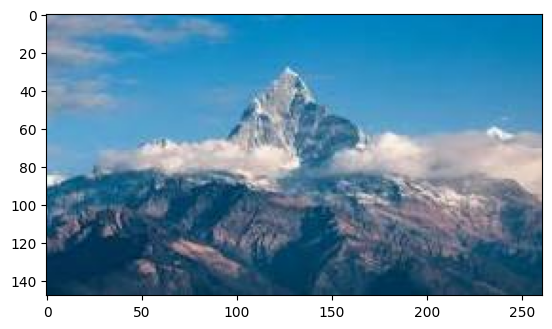

In [18]:
plt.imshow(convertBase64("1.jpg"))

### Converting this Image into vector using pre tarined model

#### converting to vector

In [20]:
helper = TensorVector("1.jpg")
vector = helper.process()

In [21]:
len(vector)

1280

### second image

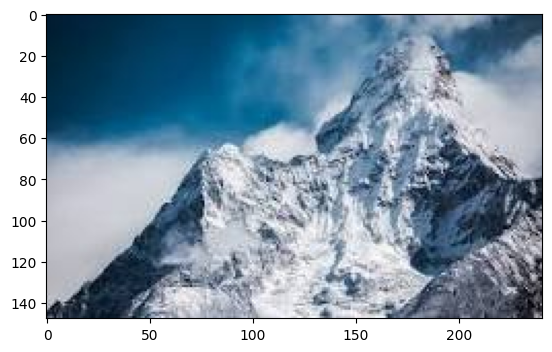

In [23]:
plt.imshow(convertBase64("2.jpg"))

In [25]:
helper = TensorVector("2.jpg")
vector2 = helper.process()

In [26]:
len(vector2)

1280

## Applying Cosine Similarity

In [27]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [30]:
pre_percent = cosineSim(vector, vector2)
print(pre_percent)

0.8124601033407087


In [32]:
percent = pre_percent * 100
print(percent)

81.24601033407087


## Therefore the images are 80% similar